In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import FinanceDataReader as fdr
import datetime
from pytz import timezone, utc

%matplotlib inline
KST = timezone('Asia/Seoul')

In [4]:
# Params
find_name = 'NAVER'
before_dt = 120
index_dt = (datetime.datetime.now(KST) - datetime.timedelta(days=120)).strftime(format='%Y-%m-%d')
stt_dt = '2020-01-01'

NAVER


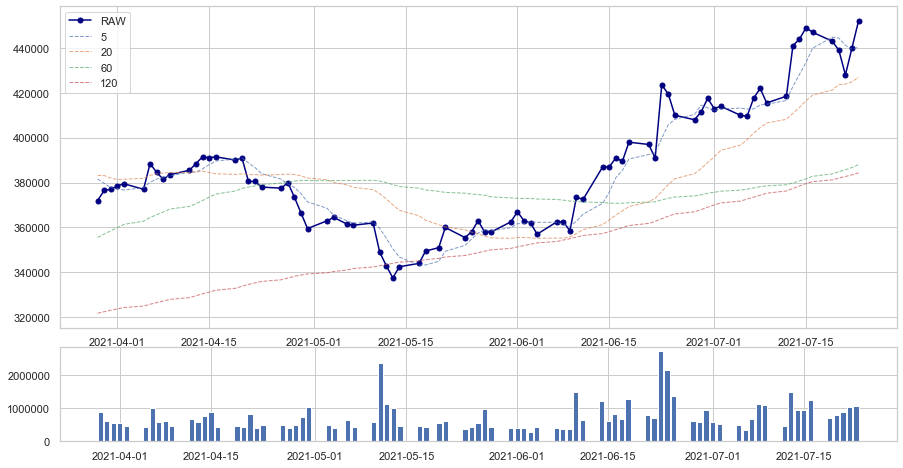

In [5]:
kospi_list = fdr.StockListing('KOSPI')

try : 
    k_cd = kospi_list.loc[kospi_list['Name'] == find_name,]['Symbol'].values[0]
    
    df = fdr.DataReader(k_cd, stt_dt)

    df['5'] = df['Close'].rolling(5).mean()
    df['20'] = df['Close'].rolling(20).mean()
    df['60'] = df['Close'].rolling(60).mean()
    df['120'] = df['Close'].rolling(120).mean()
    df_plot = df.loc[df.index >= index_dt, ]

    print(find_name)
    f = plt.subplots(figsize=(15, 8))
    top_ax = plt.subplot2grid((4, 4), (0,0), rowspan=3, colspan=4)
    bot_ax = plt.subplot2grid((4, 4), (3,0), rowspan=1, colspan=4)

    top_ax.plot(df_plot['Close'], c = 'navy', marker='o', markersize=5)
    top_ax.plot(df_plot[['5', '20','60', '120']], linestyle='--', linewidth=1, alpha=.7)
    top_ax.legend(['RAW','5', '20','60', '120'])
    bot_ax.bar(df_plot.index,df_plot['Volume'])

except IndexError :
    print('이름 재검색 필요: 종목 List에 없는 Code')

except :
    print('코드 재점검 필요')